# Author : Damini Badgujar


# Task 1 : Prediction using Supervised ML

**In this task I'll Predict the percentage of an student based on the no. of study hours. This is a simple linear regression task as it involves just 2 variables.**

In [11]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
#Reading the dataset
url='http://bit.ly/w-data'
data=pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Data Visualization 

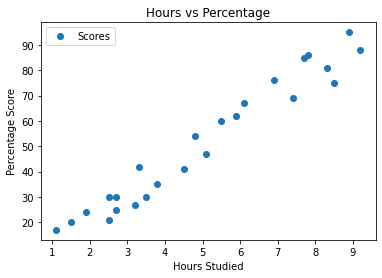

In [3]:
data.plot(x ='Hours', y='Scores',style ='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**Conclusion : From the above graph, we can clearly see that there is positive correlation between study hours and percentage**

# Fitting the Regression line

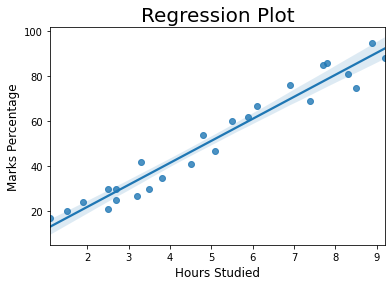

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [4]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

#  Training the Model
**1) Splitting the Data**

In [5]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [6]:
# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

 **2) Fitting the Data into the model**

In [7]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("Model Trained")

Model Trained


In [8]:
y_pred=regression.predict(val_X)
pred =pd.DataFrame({'Actual Marks': val_y ,'Predicted Marks':y_pred})
pred

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


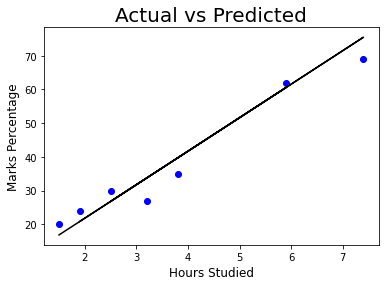

In [9]:
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, y_pred , color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

# Evaluating the Model

In [10]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,y_pred))

#accuracy score of our model
print("Training Score:",regression.score(train_X,train_y))
print("Test Score:",regression.score(val_X,val_y))

Mean absolute error:  4.130879918502486
Training Score: 0.9484509249326872
Test Score: 0.9367661043365055


In [12]:
R_2=r2_score(val_y,y_pred)
print('R squared is',R_2)

R squared is 0.9367661043365055


**It means that the model explain 93.69 % of variation within the data, from this we conclude that higher r-squared indicates the good fit for the model.**

In [13]:
#own prediction
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


# Conclusion :  

# if a student studies for 9.25 hours a day he/she will score 93.89 %.